# Importing the dataset

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('laptop_data.csv')

In [41]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# EDA

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

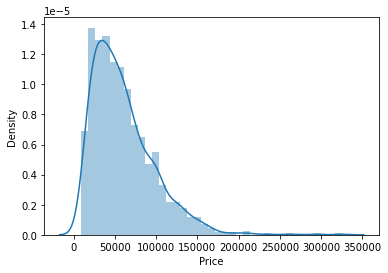

In [43]:
sns.distplot(df['Price'])

<AxesSubplot:xlabel='Company', ylabel='count'>

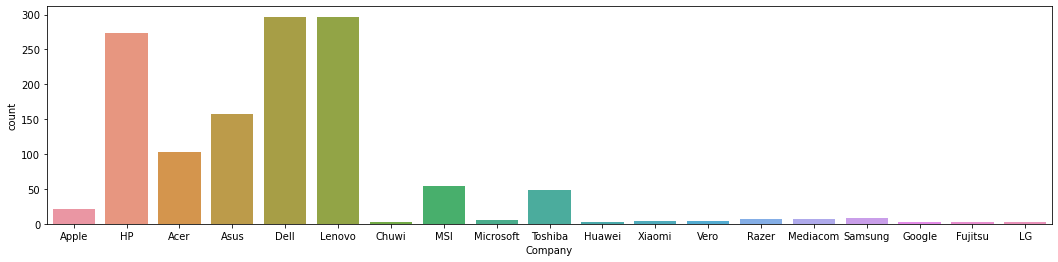

In [44]:
plt.figure(figsize=(18,4))
sns.countplot(x='Company', data=df)

<AxesSubplot:xlabel='Company', ylabel='Price'>

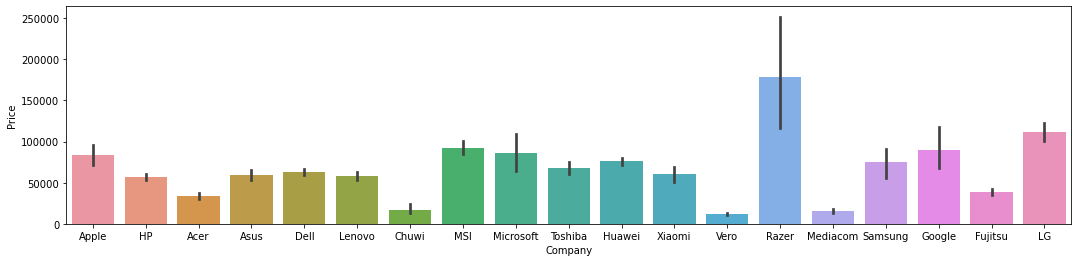

In [45]:
plt.figure(figsize=(18,4))
sns.barplot(x='Company', y='Price', data=df)

<AxesSubplot:xlabel='TypeName', ylabel='count'>

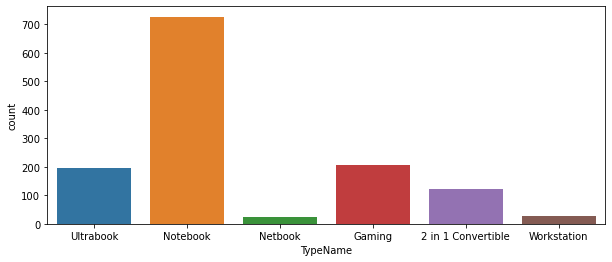

In [46]:
plt.figure(figsize=(10,4))
sns.countplot(x='TypeName', data=df)

<AxesSubplot:xlabel='TypeName', ylabel='Price'>

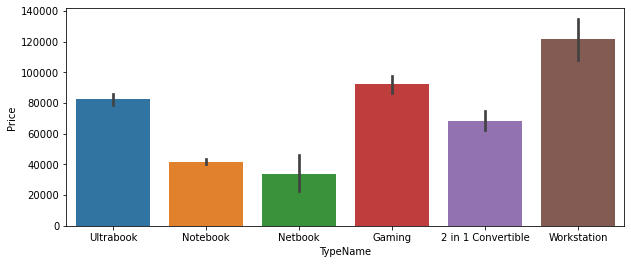

In [47]:
plt.figure(figsize=(10,4))
sns.barplot(x='TypeName', y='Price', data=df)

<AxesSubplot:xlabel='Inches', ylabel='count'>

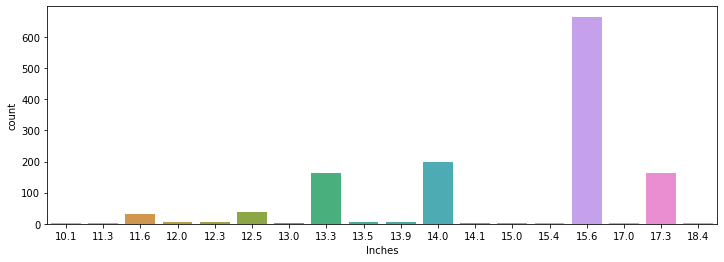

In [48]:
plt.figure(figsize=(12,4))
sns.countplot(x='Inches', data=df)

In [49]:
# sns.distplot(df['Weight'])

# Data Preprocessing

In [50]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Touchscreen 2560x1440               

In [51]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [52]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [53]:
df['X_resolution'] = df['ScreenResolution'].apply(lambda x: x.split('x')[0])
df['Y_resolution'] = df['ScreenResolution'].apply(lambda x: x.split('x')[1])

In [54]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_resolution,Y_resolution
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,Full HD 1920,1080
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [55]:
import re

In [56]:
df['X_resolution'] = df['X_resolution'].apply(lambda x: re.sub(r'[^\d]', '', x))

In [57]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_resolution,Y_resolution
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,2560,1600
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920,1080
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,2880,1800
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,2560,1600


In [58]:
df['X_resolution'] = df['X_resolution'].astype('int')
df['Y_resolution'] = df['Y_resolution'].astype('int')

In [59]:
df['ppi'] = (((df['X_resolution']**2) + (df['Y_resolution']**2))**0.5/df['Inches']).astype('float')

In [60]:
df = df.drop('ScreenResolution', axis=1)

In [61]:
df = df.drop(['Inches', 'X_resolution', 'Y_resolution'], axis=1)

In [62]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
AMD E-Series 6110 1.5GHz           1
AMD A4-Series 7210 2.2GHz          1
Intel Core i3 6100U 2.1GHz         1
Intel Core i5 7500U 2.7GHz         1
Intel Xeon E3-1535M v5 2.9GHz      1
Name: Cpu, Length: 118, dtype: int64

In [63]:
df['Cpu Brand'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [64]:
df.head()

,Unnamed: 0,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand
0,0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5
1,1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5
2,2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5
3,3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7
4,4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5


In [65]:
def processor(text):
    if text == 'Intel Core i3' or text == 'Intel Core i5' or text == 'Intel Core i7':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [66]:
df['Cpu Brand'] = df['Cpu Brand'].apply(processor)

<AxesSubplot:xlabel='Cpu Brand', ylabel='count'>

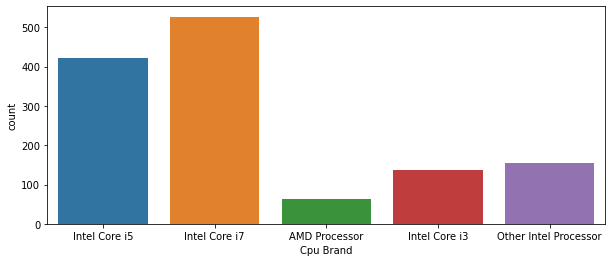

In [67]:
plt.figure(figsize=(10,4))
sns.countplot(x='Cpu Brand', data=df)

<AxesSubplot:xlabel='Cpu Brand', ylabel='Price'>

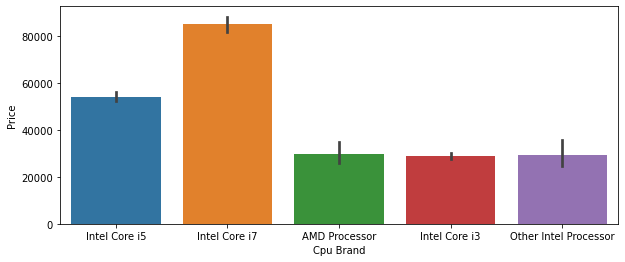

In [68]:
plt.figure(figsize=(10,4))
sns.barplot(x='Cpu Brand', y='Price', data=df)

In [69]:
df = df.drop('Cpu', axis=1)

In [70]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

<AxesSubplot:xlabel='Ram', ylabel='count'>

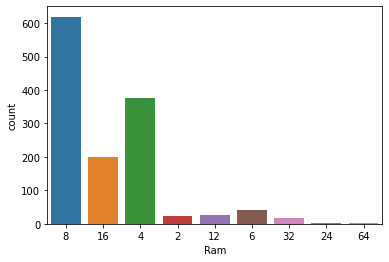

In [71]:
sns.countplot(x='Ram', data=df)

In [72]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
128GB HDD                          1
2

In [73]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

In [74]:
df

,Unnamed: 0,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand
0,0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400,1,1,157.350512,Intel Core i7
1299,1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200,1,1,276.053530,Intel Core i7
1300,1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200,0,0,111.935204,Other Intel Processor
1301,1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7


In [75]:
df['Memory'].value_counts()

256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
16 SSD                            3
512 SSD +  2000 HDD               3
256 SSD +  256 SSD                2
1000 SSD +  1000 HDD              2
128 SSD +  2000 HDD               2
256 SSD +  500 HDD                2
512 Flash Storage                 2
512 SSD +  512 SSD                1
1000 HDD +  1000 HDD        

In [76]:
new = df["Memory"].str.split("+", n = 1, expand = True)

In [77]:
new.value_counts()

0                  1            
128 SSD              1000 HDD       94
256 SSD              1000 HDD       73
512 SSD              1000 HDD       14
256 SSD              2000 HDD       10
512 SSD              2000 HDD        3
256 SSD              500 HDD         2
                     256 SSD         2
128 SSD              2000 HDD        2
1000 SSD             1000 HDD        2
64 Flash Storage     1000 HDD        1
512 SSD              512 SSD         1
                     256 SSD         1
                     1000 Hybrid     1
256 SSD              1000 Hybrid     1
1000 HDD             1000 HDD        1
dtype: int64

In [78]:
df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

In [79]:
df.head()

,Unnamed: 0,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,first,second
0,0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,None
1,1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,None
2,2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,None
3,3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,None
4,4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,None


In [49]:
df['first'].value_counts()

256 SSD              500
1000 HDD             225
128 SSD              172
512 SSD              138
500 HDD              132
32 Flash Storage      38
1000 SSD              16
64 Flash Storage      16
2000 HDD              16
1000 Hybrid            9
256 Flash Storage      8
16 Flash Storage       7
32 SSD                 6
180 SSD                5
128 Flash Storage      4
16 SSD                 3
512 Flash Storage      2
508 Hybrid             1
8 SSD                  1
240 SSD                1
32 HDD                 1
64 SSD                 1
128 HDD                1
Name: first, dtype: int64

In [50]:
df["HDD1"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["SSD1"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Hybrid1"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Flash_Storage1"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [51]:
df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

In [53]:
df['first'].value_counts()

256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
508       1
240       1
8         1
Name: first, dtype: int64

In [52]:
df["HDD2"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["SSD2"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Hybrid2"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Flash_Storage2"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [54]:
df['second'] = df['second'].str.replace(r'\D', '')

In [56]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [58]:
df["HDD"]=(df["first"]*df["HDD1"]+df["second"]*df["HDD2"])
df["SSD"]=(df["first"]*df["SSD1"]+df["second"]*df["SSD2"])
df["Hybrid"]=(df["first"]*df["Hybrid1"]+df["second"]*df["Hybrid2"])
df["Flash_Storage"]=(df["first"]*df["Flash_Storage1"]+df["second"]*df["Flash_Storage2"])

In [59]:
df.drop(columns=['first', 'second', 'HDD1', 'SSD1', 'Hybrid1',
       'Flash_Storage1', 'HDD2', 'SSD2', 'Hybrid2',
       'Flash_Storage2'],inplace=True)

In [61]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Touchscreen,Ips,X_resolution,Y_resolution,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,0,1,2560,1600,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,0,0,1440,900,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,...,0,0,1920,1080,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,...,0,1,2880,1800,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,0,1,2560,1600,226.983005,Intel Core i5,0,256,0,0


In [66]:
df['Gpu'].value_counts()

Intel HD Graphics 620        281
Intel HD Graphics 520        185
Intel UHD Graphics 620        68
Nvidia GeForce GTX 1050       66
Nvidia GeForce GTX 1060       48
                            ... 
AMD Radeon Pro 555             1
AMD Radeon R7 M360             1
AMD Radeon R5 520              1
Nvidia GeForce GTX1050 Ti      1
Intel Iris Pro Graphics        1
Name: Gpu, Length: 110, dtype: int64

In [67]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [68]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [69]:
df = df[df['Gpu brand'] != 'ARM']

In [70]:
df = df.drop('Gpu', axis=1)

In [71]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

In [72]:
def os(text):
    if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
        return 'Windows'
    elif text == 'macOS' or text == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [74]:
df['os'] = df['OpSys'].apply(os)

<AxesSubplot:xlabel='os', ylabel='count'>

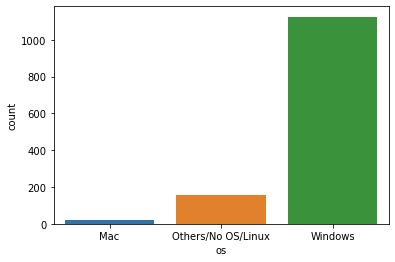

In [75]:
sns.countplot(x='os', data=df)

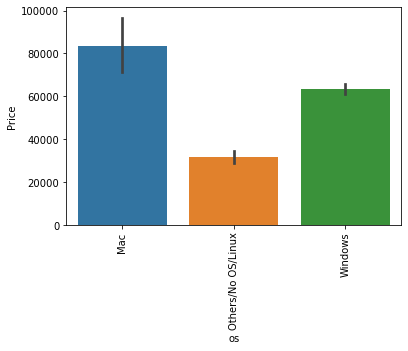

In [76]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [78]:
df.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
0,Apple,Ultrabook,8,128 SSD,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,128 Flash Storage,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,256 SSD,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,512 SSD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,256 SSD,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


In [79]:
df = df.drop(['Memory', 'OpSys'], axis=1)

<AxesSubplot:>

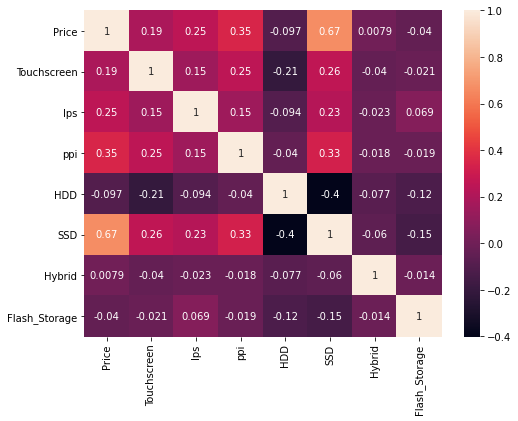

In [81]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

In [82]:
df = df.drop(['Hybrid', 'Flash_Storage'], axis=1)

In [93]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


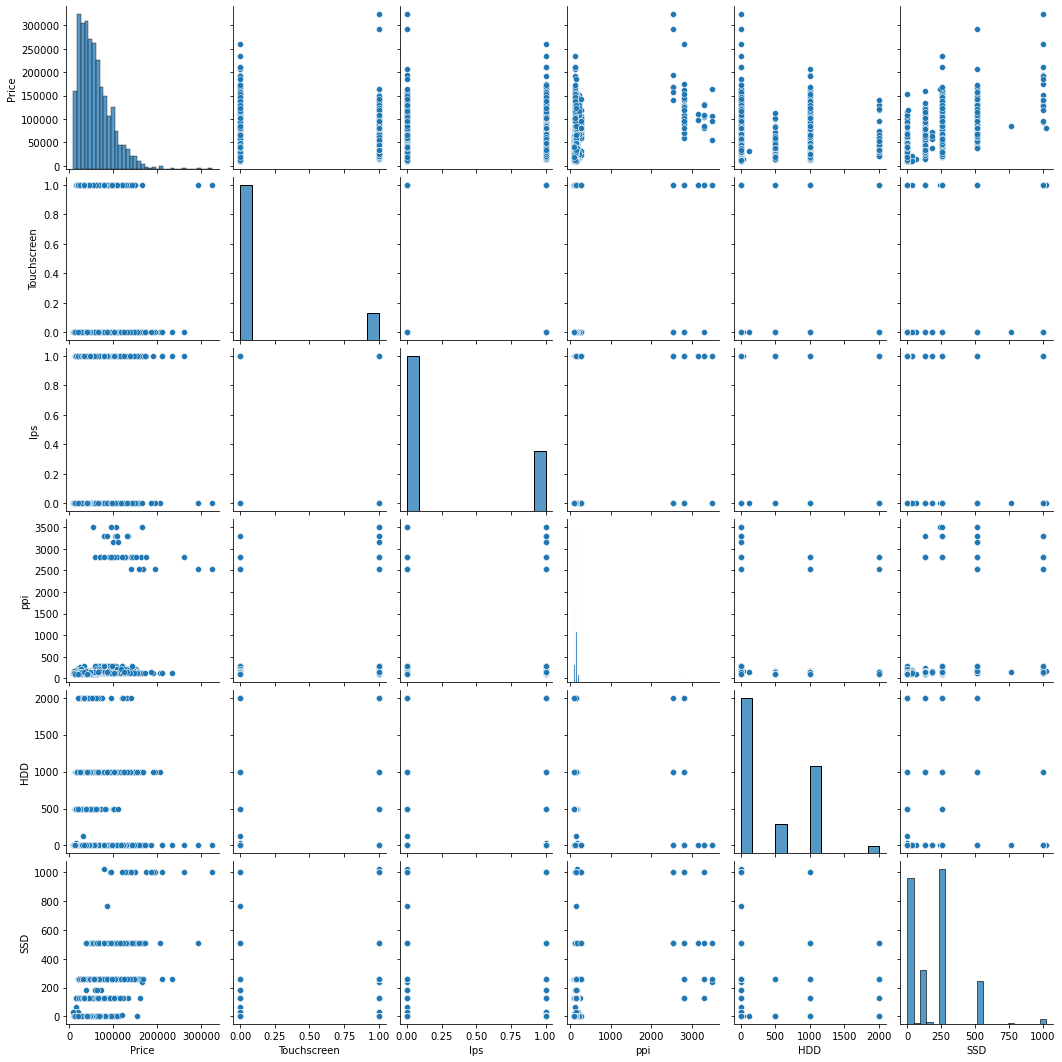

In [83]:
sns.pairplot(df)

Distribution of target column is right skewed. We will apply log transformation to make it normal

# Train-test split

In [84]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

# Model Building

In [107]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [108]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor

In [109]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Random Forest

In [110]:
one_hot = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

reg = RandomForestRegressor()

pipe = Pipeline([('one_hot',one_hot), ('reg',reg)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.887440408518643
MAE 0.15589512295045332


In [111]:
#### Hyperparameter tuning ####

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'bootstrap':[True, False],
                'criterion':['mse']}

rf_ran_cv = RandomizedSearchCV(estimator=reg, param_distributions=parameters, n_jobs=-1, cv=5, verbose=2)

pipe = Pipeline([('one_hot',one_hot), ('ran_cv',rf_ran_cv)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
R2 score 0.8891095430225585
MAE 0.1605237554296014


## Extra Trees

In [112]:
one_hot = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

reg = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([('one_hot',one_hot), ('reg',reg)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8734225147219046
MAE 0.16165270928412434


In [113]:
#### Hyperparameter tuning ####

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'bootstrap':[True, False],
                'criterion':['mse']
                }

et_ran_cv = RandomizedSearchCV(estimator=reg, param_distributions=parameters, n_jobs=-1, cv=5, verbose=2)

pipe = Pipeline([('one_hot',one_hot), ('ran_cv',et_ran_cv)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
R2 score 0.8630378753951824
MAE 0.1740710528630416


## XGBoost

In [114]:
one_hot = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

reg = XGBRegressor()

pipe = Pipeline([('one_hot',one_hot), ('reg',reg)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8778965244926753
MAE 0.15809261547442596


In [115]:
#### Hyperparameter tuning ####

parameters = {'max_depth': np.arange(2, 12, 2),  
              'alpha': [0, .001, .01, .1],
              'learning_rate': np.linspace(0.001, 0.6, 15),
              'colsample_bytree': np.linspace(0.1, 1, 5),
              'subsample': np.linspace(0.25, 1, 15),
              'n_estimators': np.arange(10, 200, 15),
              'min_child_weight':[1,3,5]}

xgb_ran_cv = RandomizedSearchCV(estimator=reg, param_distributions=parameters, n_jobs=-1, cv=5, verbose=2)

pipe = Pipeline([('one_hot',one_hot), ('ran_cv',xgb_ran_cv)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
R2 score 0.8827039985302831
MAE 0.1626233458889428


## Voting Regressor

In [117]:
from sklearn.ensemble import VotingRegressor

one_hot = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')


rf = rf_ran_cv
xgb = xgb_ran_cv
et = et_ran_cv

reg = VotingRegressor([('rf', rf), ('xgb',xgb), ('et',et)], weights=[5,1,4])

pipe = Pipeline([('one_hot',one_hot),('reg',reg)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
R2 score 0.8952545211841357
MAE 0.15613059815482724


# Exporting the model

In [118]:
import pickle

pickle.dump(df, open('df.pkl','wb'))
pickle.dump(pipe, open('pipe.pkl','wb'))